In [1]:
import math
import random
import time
import timeit 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class MinHeap:
    def __init__(self, data):
        self.items = data
        self.length = len(data)
        self.build_heap()

        # add a map based on input node
        self.map = {}
        for i in range(self.length):
            self.map[self.items[i].value] = i

    def find_left_index(self,index):
        return 2 * (index + 1) - 1

    def find_right_index(self,index):
        return 2 * (index + 1)

    def find_parent_index(self,index):
        return (index + 1) // 2 - 1  
    
    def sink_down(self, index):
        smallest_known_index = index

        if self.find_left_index(index) < self.length and self.items[self.find_left_index(index)].key < self.items[index].key:
            smallest_known_index = self.find_left_index(index)

        if self.find_right_index(index) < self.length and self.items[self.find_right_index(index)].key < self.items[smallest_known_index].key:
            smallest_known_index = self.find_right_index(index)

        if smallest_known_index != index:
            self.items[index], self.items[smallest_known_index] = self.items[smallest_known_index], self.items[index]
            
            # update map
            self.map[self.items[index].value] = index
            self.map[self.items[smallest_known_index].value] = smallest_known_index

            # recursive call
            self.sink_down(smallest_known_index)

    def build_heap(self,):
        for i in range(self.length // 2 - 1, -1, -1):
            self.sink_down(i) 

    def insert(self, node):
        if len(self.items) == self.length:
            self.items.append(node)
        else:
            self.items[self.length] = node
        self.map[node.value] = self.length
        self.length += 1
        self.swim_up(self.length - 1)

    def insert_nodes(self, node_list):
        for node in node_list:
            self.insert(node)

    def swim_up(self, index):
        
        while index > 0 and self.items[self.find_parent_index(index)].key < self.items[self.find_parent_index(index)].key:
            #swap values
            self.items[index], self.items[self.find_parent_index(index)] = self.items[self.find_parent_index(index)], self.items[index]
            #update map
            self.map[self.items[index].value] = index
            self.map[self.items[self.find_parent_index(index)].value] = self.find_parent_index(index)
            index = self.find_parent_index(index)

    def get_min(self):
        if len(self.items) > 0:
            return self.items[0]

    def extract_min(self,):
        if self.length > 0:
            #xchange
            self.items[0], self.items[self.length - 1] = self.items[self.length - 1], self.items[0]
            #update map
            self.map[self.items[self.length - 1].value] = self.length - 1
            self.map[self.items[0].value] = 0

            min_node = self.items[self.length - 1]
            self.length -= 1
            self.map.pop(min_node.value)
            self.sink_down(0)
            return min_node
        else:
            return None

    def decrease_key(self, value, new_key):
        if new_key >= self.items[self.map[value]].key:
            return
        index = self.map[value]
        self.items[index].key = new_key
        self.swim_up(index)

    def get_element_from_value(self, value):
        return self.items[self.map[value]]
    
    def __contains__(self, value):
        for item in self.items:
            if item.value == value:
                return True
        return False

    def is_empty(self):
        return self.length == 0
    
    def __str__(self):
        height = math.ceil(math.log(self.length + 1, 2))
        whitespace = 2 ** height + height
        s = ""
        for i in range(height):
            for j in range(2 ** i - 1, min(2 ** (i + 1) - 1, self.length)):
                s += " " * whitespace
                s += str(self.items[j]) + " "
            s += "\n"
            whitespace = whitespace // 2
        return s


In [3]:
class WeightedGraph:

    def __init__(self,nodes):
        self.graph=[]
        self.weights={}
        for node in range(nodes):
            self.graph.append([])

    def add_node(self,node):
        self.graph[node]=[]

    def add_edge(self, node1, node2, weight):
        if node2 not in self.graph[node1]:
            self.graph[node1].append(node2)
        self.weights[(node1, node2)] = weight

    def get_weights(self, node1, node2):
        if self.are_connected(node1, node2):
            return self.weights[(node1, node2)]

    def are_connected(self, node1, node2):
        for neighbour in self.graph[node1]:
            if neighbour == node2:
                return True
        return False

    def get_neighbors(self, node):
        return self.graph[node]

    def get_number_of_nodes(self,):
        return len(self.graph)
    
    def get_nodes(self,):
        return [i for i in range(len(self.graph))]
    def heuristic(self, node, destination):
        if node in self.get_nodes():
            if destination in self.graph[node]:
                return self.get_weights(node, destination)
            else:
                total_weight = 0
                edge_count = 0
                for neighbors in self.graph[node]:
                        edge_weight = self.get_weights(node, neighbors)
                        total_weight += edge_weight
                        edge_count += 1
                if edge_count == 0:
                    return 0  # Return 0 if there are no edges
                return total_weight / edge_count
    def print_graph(self):
        print("Graph Content:")
        for node in range(len(self.graph)):
            print(f"Node {node}:")
            for neighbour in self.graph[node]:
                weight = self.get_weights(node, neighbour)
                print(f"  -> Neighbour: {neighbour}, Weight: {weight}")

In [4]:
class Item:
    def __init__(self, value, key):
        self.key = key
        self.value = value
    
    def __str__(self):
        return "(" + str(self.key) + "," + str(self.value) + ")"

In [83]:
def dijkstra(graph, source, destination):
    visited = {node: False for node in range(graph.get_number_of_nodes())}
    distance = {node: float('inf') for node in range(graph.get_number_of_nodes())}

    Q = MinHeap([])

    for i in range(graph.get_number_of_nodes()):
        Q.insert(Item(i, float('inf')))

    Q.decrease_key(source, 0)
    distance[source] = 0

    while not Q.is_empty():
        current_node = Q.extract_min().value
        visited[current_node] = True

        if current_node == destination:
            break

        for neighbor in graph.graph[current_node]:
            edge_weight = graph.get_weights(current_node, neighbor)
            temp = distance[current_node] + edge_weight

            if not visited[neighbor] and temp < distance[neighbor]:
                distance[neighbor] = temp
                Q.decrease_key(neighbor, temp)

    return distance[destination] if distance[destination] != float('inf') else None


"""def dijkstra(graph, source, destination):
    visited = {node: False for node in range(graph.get_number_of_nodes())}
    distance = {node: float('inf') for node in range(graph.get_number_of_nodes())}

    Q = MinHeap([])

    for i in range(graph.get_number_of_nodes()):
        Q.insert(Item(i, float('inf')))

    Q.decrease_key(source, 0)
    distance[source] = 0

    while not Q.is_empty():
        current_node = Q.extract_min().value
        visited[current_node] = True

        if current_node == destination:
            continue

        for neighbor in graph.graph[current_node]:
            edge_weight = graph.get_weights(current_node, neighbor)
            temp = distance[current_node] + edge_weight

            if not visited[neighbor] and temp < distance[neighbor]:
                distance[neighbor] = temp
                Q.decrease_key(neighbor, temp)

    return distance[destination] if visited[destination] else float('inf')
    """

"def dijkstra(graph, source, destination):\n    visited = {node: False for node in range(graph.get_number_of_nodes())}\n    distance = {node: float('inf') for node in range(graph.get_number_of_nodes())}\n\n    Q = MinHeap([])\n\n    for i in range(graph.get_number_of_nodes()):\n        Q.insert(Item(i, float('inf')))\n\n    Q.decrease_key(source, 0)\n    distance[source] = 0\n\n    while not Q.is_empty():\n        current_node = Q.extract_min().value\n        visited[current_node] = True\n\n        if current_node == destination:\n            continue\n\n        for neighbor in graph.graph[current_node]:\n            edge_weight = graph.get_weights(current_node, neighbor)\n            temp = distance[current_node] + edge_weight\n\n            if not visited[neighbor] and temp < distance[neighbor]:\n                distance[neighbor] = temp\n                Q.decrease_key(neighbor, temp)\n\n    return distance[destination] if visited[destination] else float('inf')\n    "

In [74]:
import math
def A_star(graph, source, destination, h):
    h = {node : float(graph.heuristic(node, destination)) for node in graph.get_nodes()}
    openset = MinHeap([])
    openset.insert(Item(source, float('inf')))
    cameFrom = {}
    gscore = {node : float('inf') for node in graph.get_nodes()}
    gscore[source] = 0
    fscore = {node : float('inf') for node in graph.get_nodes()}
    fscore[source] = h[source]
    #print(cameFrom, openset)
    while not openset.is_empty():
        current_min = openset.extract_min()
        
        #print(current)
        if current_min == destination:
            break
        if current_min is None:
            break
        current = current_min.value
        for neighbour in graph.graph[current]:
            t_gscore = gscore[current]+ graph.get_weights(current, neighbour)
            if t_gscore < gscore[neighbour]:
                cameFrom[neighbour] = current
                gscore[neighbour] = t_gscore
                fscore[neighbour] = t_gscore + h[neighbour]
                if neighbour not in openset:
                    #print(neighbour)
                    openset.insert(Item(neighbour, fscore[neighbour]))
                    #print(openset)
    shortestpath = []
    if destination not in cameFrom:
        return None, None
    else:
        shortestpath = []
        current = destination
        while current in cameFrom:
            shortestpath.insert(0, current)
            current = cameFrom[current]
        shortestpath.insert(0, source)
        return cameFrom, shortestpath

In [75]:
import csv
disinfo = []
# Open the CSV file in read mode
with open('london_stations.csv', newline='') as csvfile:
    # Create a CSV reader object
    reader = csv.reader(csvfile)
    
    # Iterate over each row in the CSV file
    for row in reader:
        disinfo.append(row[0:3])
    #print(disinfo)

In [76]:
import csv
stinfo = []
# Open the CSV file in read mode
with open('london_connections.csv', newline='') as csvfile:
    # Create a CSV reader object
    reader = csv.reader(csvfile)
    
    # Iterate over each row in the CSV file
    for row in reader:
        stinfo.append(row[0: 3])
    

In [54]:

subway = []
for st in stinfo:
    if st[0].isdigit() and st[1].isdigit():
        st1 = st[0]
        st2 = st[1]
        for dis in disinfo:
            if dis[0] == st1:
                lat1_str, lon1_str = dis[1], dis[2]
            if dis[0] == st2:
                lat2_str, lon2_str = dis[1], dis[2]

        # Convert latitude and longitude to floats only when needed for calculations
        lat1 = float(lat1_str)
        lon1 = float(lon1_str)
        lat2 = float(lat2_str)
        lon2 = float(lon2_str)

        lati1 = math.radians(lat1)
        longi1 = math.radians(lon1)
        lati2 = math.radians(lat2)
        longi2 = math.radians(lon2)

        # Calculate differences in latitude and longitude
        delta_lat = lat2 - lat1
        delta_lon = lon2 - lon1
        
        # Calculate Euclidean distance
        distance = math.sqrt(delta_lat**2 + delta_lon**2)

        subway.append([st1, st2, distance])


In [55]:
test = []
tofind = []
for sub in subway:
    if 11 == int(sub[0]):
        tofind.append(sub[1])
for sub in subway:
    if sub[0] in tofind:
        test.append(sub[1])
for sub in subway:
    if '11' in sub[0] and '28' in sub[1]:
        print(sub)
    if '28' in sub[0] and '162' in sub[1]:
        print(sub)

['28', '162', 0.009219544457293245]
['11', '28', 0.011395174417265829]


In [56]:
#Creating a graph using the london subway data
sub = len(subway)
graph = WeightedGraph(sub)
for lines in subway:
    graph.add_edge(int(lines[0]), int(lines[1]), lines[2])


In [57]:
graph.print_graph()

Graph Content:
Node 0:
Node 1:
  -> Neighbour: 73, Weight: 0.010904127658827683
  -> Neighbour: 234, Weight: 0.02715326867984767
  -> Neighbour: 265, Weight: 0.026541476974727668
Node 2:
  -> Neighbour: 156, Weight: 0.007647875522000702
  -> Neighbour: 263, Weight: 0.004632493928760355
Node 3:
  -> Neighbour: 263, Weight: 0.006881860213635047
  -> Neighbour: 295, Weight: 0.01208139064843043
  -> Neighbour: 156, Weight: 0.00999249718538901
Node 4:
  -> Neighbour: 70, Weight: 0.012371337841964878
  -> Neighbour: 201, Weight: 0.005243090691567397
Node 5:
  -> Neighbour: 194, Weight: 0.020761743664731085
  -> Neighbour: 252, Weight: 0.018783237207679597
Node 6:
  -> Neighbour: 46, Weight: 0.046351806868772265
Node 7:
  -> Neighbour: 145, Weight: 0.018054362353736295
  -> Neighbour: 188, Weight: 0.01941803285608631
Node 8:
  -> Neighbour: 124, Weight: 0.016248384535084967
  -> Neighbour: 264, Weight: 0.008852683209062769
Node 9:
  -> Neighbour: 31, Weight: 0.012803515142332097
  -> Neighbou

In [58]:
A_star(graph, 1, 234, {})

({73: 1, 234: 1, 265: 1, 182: 73, 194: 182}, [1, 234])

In [44]:
graph1 = WeightedGraph(3)
graph1.add_edge(1, 2, 0.011395174417265829)
graph1.add_edge(2, 223,0.009219544457293245)
graph1.print_graph()

Graph Content:
Node 0:
Node 1:
  -> Neighbour: 2, Weight: 0.011395174417265829
Node 2:
  -> Neighbour: 223, Weight: 0.009219544457293245


In [45]:
dijkstra(graph, 1, 234)

0.02715326867984767

In [46]:
graph.get_weights(28, 259)

In [47]:
graph.get_number_of_nodes()
    

406

In [48]:
graph.get_weights(1, 73)

0.010904127658827683

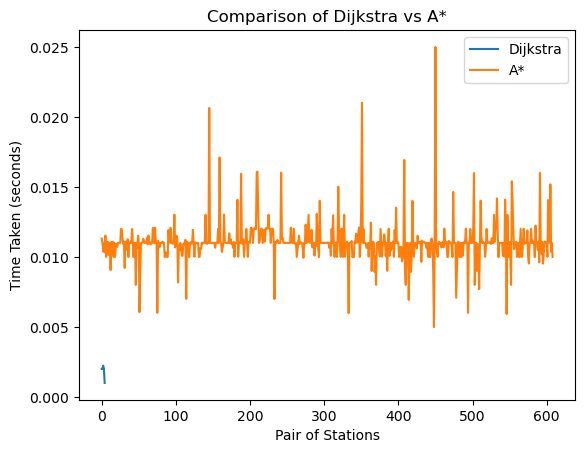

In [60]:
def compute_time_for_all_pairs(graph):
    dijkstra_times = []
    a_star_times = []

    stations = graph.get_nodes()
    num_stations = 304

    for i in range(num_stations):
        for j in range(i + 1, num_stations):  # Avoid duplicate pairs
            source = stations[i]
            destination = stations[j]

            # Compute time taken by Dijkstra's algorithm
            start_time = time.time()
            dijkstra_length = dijkstra(graph, source, destination)
            end_time = time.time()
            if dijkstra_length != float('inf'):  # Path exists
                dijkstra_times.append(end_time - start_time)

            # Compute time taken by A* algorithm
            
            start_time = time.time()
            _, a_star_path = A_star(graph, source, destination, {})
            end_time = time.time()
            if a_star_path is not None:  # Path exists: 
                a_star_times.append(end_time - start_time)

    return dijkstra_times, a_star_times

# Plot a comparison graph
def plot_comparison_graph(dijkstra_times, a_star_times):
    plt.plot(dijkstra_times, label='Dijkstra')
    plt.plot(a_star_times, label='A*')
    plt.xlabel('Pair of Stations')
    plt.ylabel('Time Taken (seconds)')
    plt.title('Comparison of Dijkstra vs A*')
    plt.legend()
    plt.show()

# Main code
dijkstra_times, a_star_times = compute_time_for_all_pairs(graph)
plot_comparison_graph(dijkstra_times, a_star_times)

In [64]:
print(dijkstra_times)
print(len(a_star_times))

[0.0020003318786621094, 0.0019998550415039062, 0.002234220504760742, 0.0019960403442382812, 0.0009996891021728516]
609


In [89]:
dijkstra(graph, 3, 263)
#graph.get_weights(3, 263)

In [67]:
A_star(graph, 136, 191, {})

({191: 136, 279: 136, 245: 191, 285: 279, 272: 245}, [136, 191])